In [1]:
pip install pandas matplotlib seaborn scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

# Load the dataset
file_path = 'INE.csv'  # Change the file path to your actual path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


      NutsID DICOFRE        region_name  year  edu_none  edu_basic  \
0  111160101  160101  Aboim das ChoÃ§as  2019        15         61   
1  111160101  160101  Aboim das ChoÃ§as  2009        30         57   
2  111160101  160101  Aboim das ChoÃ§as  1999        49         73   
3  111160101  160101  Aboim das ChoÃ§as  1989       167         97   
4  111160102  160102             AguiÃ£  2019        24         68   

   edu_secondary  edu_superior  labour_family  labour_holder  ...  olive_area  \
0             11             7             34             15  ...           0   
1              4             4             50             24  ...           0   
2              7             6             62             26  ...           0   
3              4             0            163             70  ...           0   
4              5             2             70             38  ...           1   

   vineyards_area  other_permanent_crop_area  fresh_fruit_holdings  \
0              12     

In [3]:
# Summary statistics for the dataset
summary_stats = data.describe()
print(summary_stats)


               year      edu_none     edu_basic  edu_secondary  edu_superior  \
count  11528.000000  11528.000000  11528.000000    11528.00000  11528.000000   
mean    2004.000000    118.076856    204.742280       28.80465     15.493147   
std       11.180825    163.280984    206.063604       32.19049     19.082666   
min     1989.000000      0.000000      0.000000        0.00000      0.000000   
25%     1996.500000     23.000000     79.000000        9.00000      4.000000   
50%     2004.000000     61.000000    146.000000       19.00000      9.000000   
75%     2011.500000    149.000000    257.000000       37.00000     20.000000   
max     2019.000000   2088.000000   2381.000000      394.00000    212.000000   

       labour_family  labour_holder  labour_spouse  labour_other_family  \
count   11528.000000   11528.000000   11528.000000         11528.000000   
mean      135.850017      67.254511      43.840996            24.859386   
std       151.810015      70.284225      56.570835    

4. Exploratory Data Analysis (EDA)
For EDA, we'll create visualizations to understand the temporal trends and relationships.

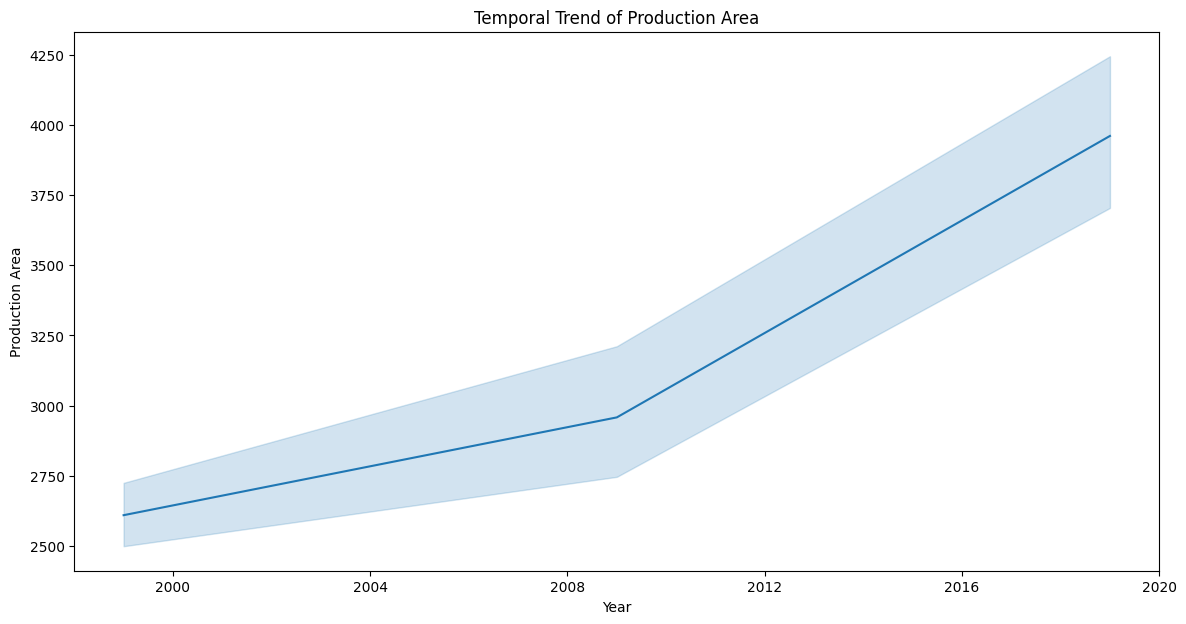

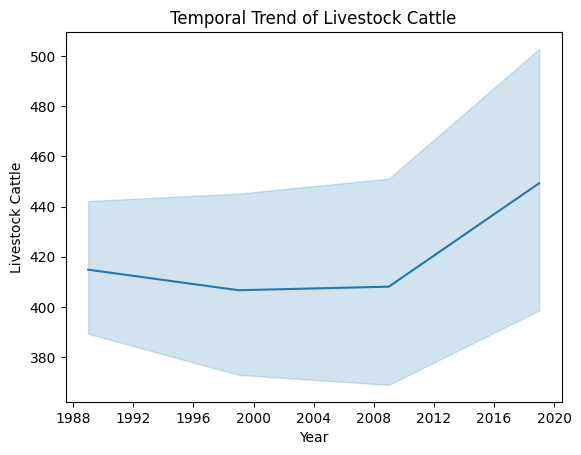

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert year to a datetime object if it's not already
data['year'] = pd.to_datetime(data['year'], format='%Y')

# Plotting temporal trends for selected variables
plt.figure(figsize=(14, 7))

# Example: Temporal trend for 'production_area'
sns.lineplot(data=data, x='year', y='production_area')
plt.title('Temporal Trend of Production Area')
plt.xlabel('Year')
plt.ylabel('Production Area')
plt.show()

# Example: Temporal trend for 'livestock_cattle'
sns.lineplot(data=data, x='year', y='livestock_cattle')
plt.title('Temporal Trend of Livestock Cattle')
plt.xlabel('Year')
plt.ylabel('Livestock Cattle')
plt.show()


acho que este proximo nao funciona porque a tabela tem valores 0 e em branco... .limpamos a tabela?

5. Inferential Statistics
We can perform inferential statistics using methods such as PCA to see the relationships between different variables over time.

In [10]:
#primeira tentativa de PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting numeric columns for PCA
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numeric_cols]#.drop(columns=['year']).fillna(0)

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Adding the year to the PCA dataframe
pc_df['year'] = data['year']

# Plotting PCA results
plt.figure(figsize=(14, 7))
sns.scatterplot(x='PC1', y='PC2', hue='year', palette='coolwarm', data=pc_df)
plt.title('PCA of Agro-Environmental Data')
plt.show()


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [7]:
#2 tentativa PCA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'INE.csv'  # Change the file path to your actual path
data = pd.read_csv(file_path)

# Convert year to a datetime object if it's not already
try:
    data['year'] = pd.to_datetime(data['year'], format='%Y')
except Exception as e:
    print(f"Error converting year to datetime: {e}")

# Check for missing values
missing_values = data.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# Selecting numeric columns for PCA
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
X = data[numeric_cols].drop(columns=['year']).fillna(0)

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
pc_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Adding the year to the PCA dataframe
pc_df['year'] = data['year'].dt.year

# Plotting PCA results
plt.figure(figsize=(14, 7))
sns.scatterplot(x='PC1', y='PC2', hue='year', palette='coolwarm', data=pc_df)
plt.title('PCA of Agro-Environmental Data')
plt.show()


Missing values in each column:
NutsID                           0
DICOFRE                          0
region_name                      0
year                             0
edu_none                         0
                                ..
fruit_holdings                   0
nuts_holdings                    0
olive_holdings                   0
vineyard_holdings                0
other_permanent_crop_holdings    0
Length: 62, dtype: int64


KeyError: "['year'] not found in axis"

6. Final Visualization Product and Storytelling
Finally, let's create a cohesive story using multiple visualizations

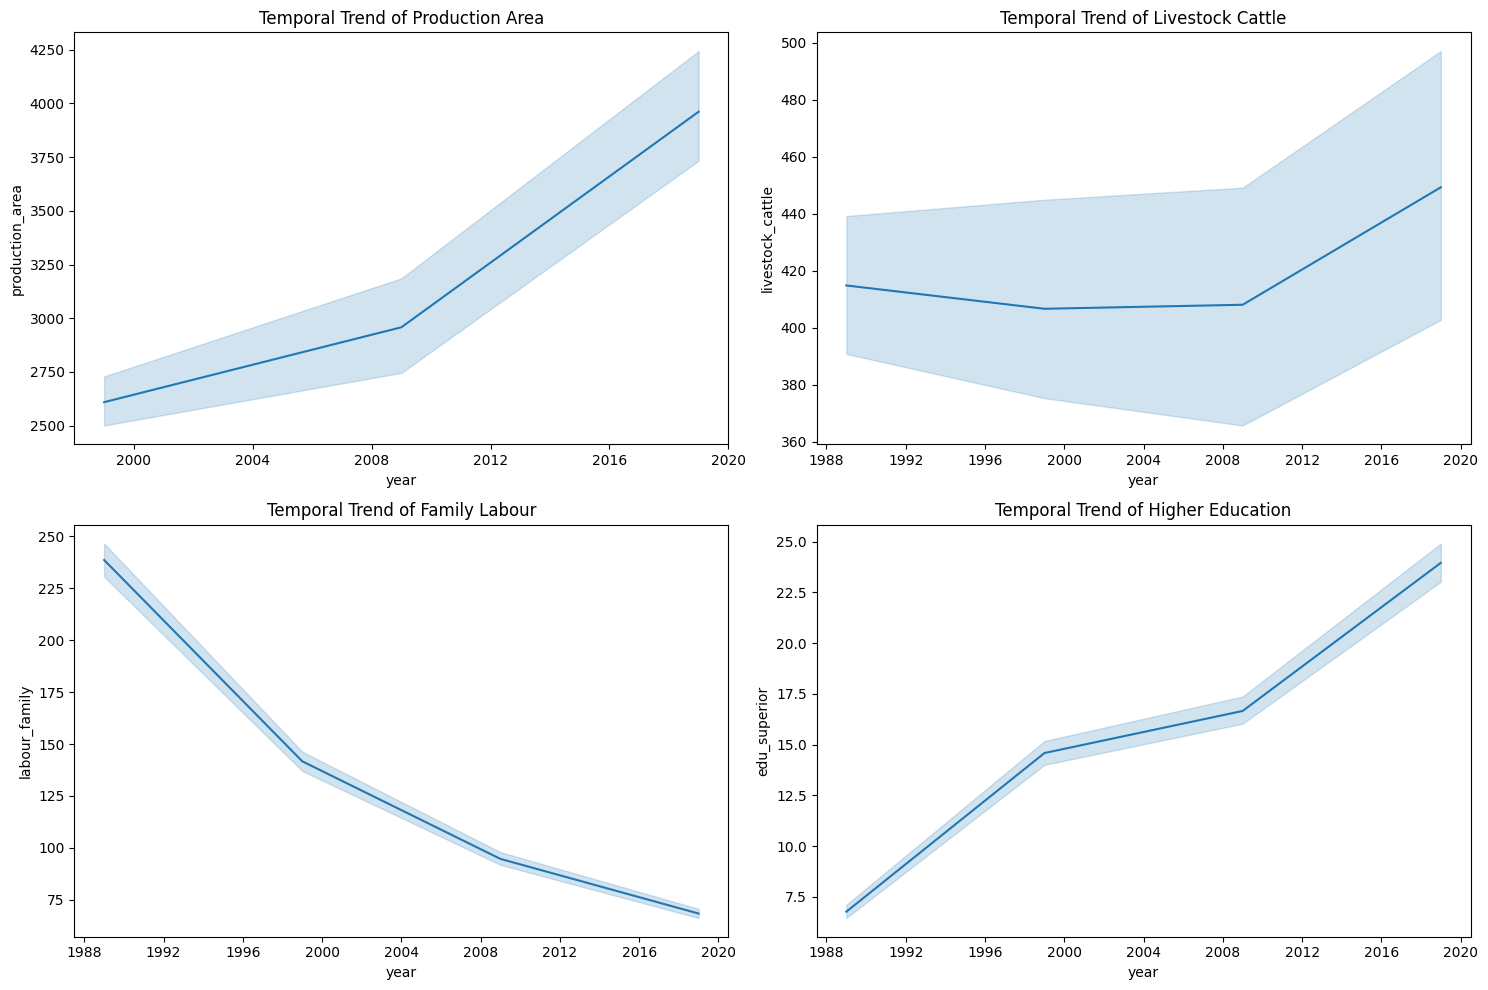

In [11]:
# Line plots for temporal trends
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.lineplot(data=data, x='year', y='production_area', ax=axes[0, 0])
axes[0, 0].set_title('Temporal Trend of Production Area')

sns.lineplot(data=data, x='year', y='livestock_cattle', ax=axes[0, 1])
axes[0, 1].set_title('Temporal Trend of Livestock Cattle')

sns.lineplot(data=data, x='year', y='labour_family', ax=axes[1, 0])
axes[1, 0].set_title('Temporal Trend of Family Labour')

sns.lineplot(data=data, x='year', y='edu_superior', ax=axes[1, 1])
axes[1, 1].set_title('Temporal Trend of Higher Education')

plt.tight_layout()
plt.show()
